In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display, clear_output
import numpy as np
from cosmopower import cosmopower_NN

2025-03-17 20:17:32.396241: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 20:17:32.435915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 20:17:32.436636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-17 20:17:33.041598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
%cd /CAMB-particlebursts/

[Errno 2] No such file or directory: '/CAMB-particlebursts/'
/home/ezmsolla/CAMB-particlebursts


In [ ]:
cp_nn = cosmopower_NN(restore=True,
                      restore_filename='TT_cp_NN',
                      )

In [ ]:



model = cp_nn  # No need to call load_model()

# Get first and last layer weights and biases
first_layer_weights = model.W[0].numpy()
first_layer_bias = model.b[0].numpy()
last_layer_weights = model.W[-1].numpy()
last_layer_bias = model.b[-1].numpy()


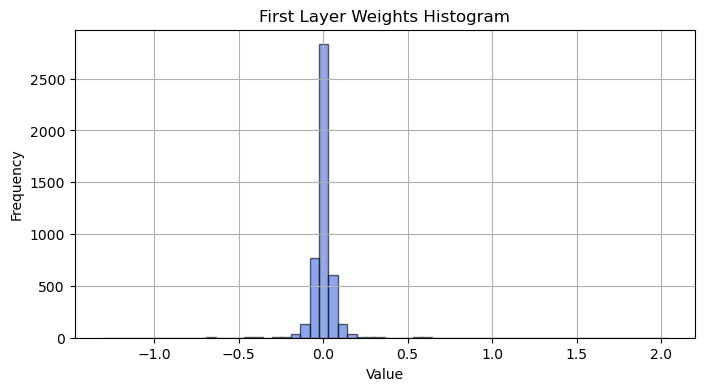

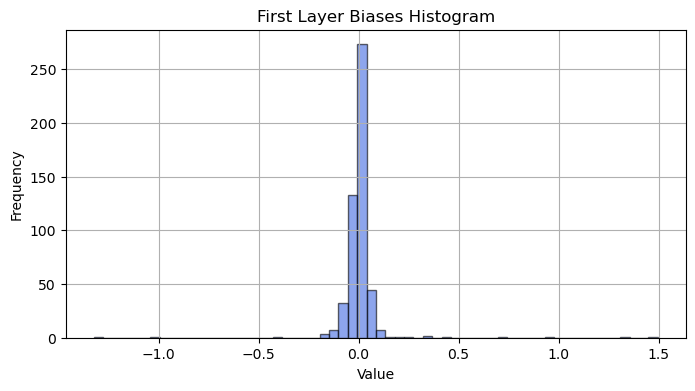

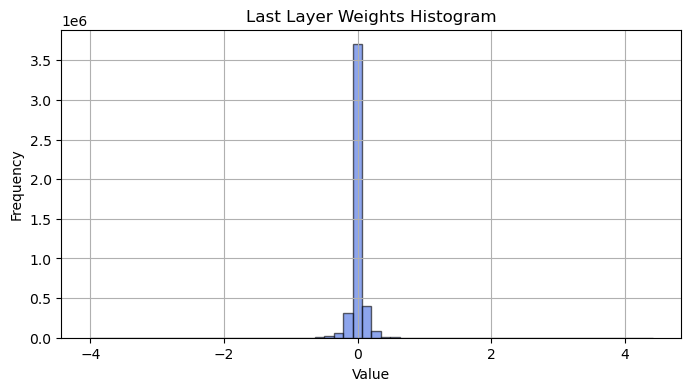

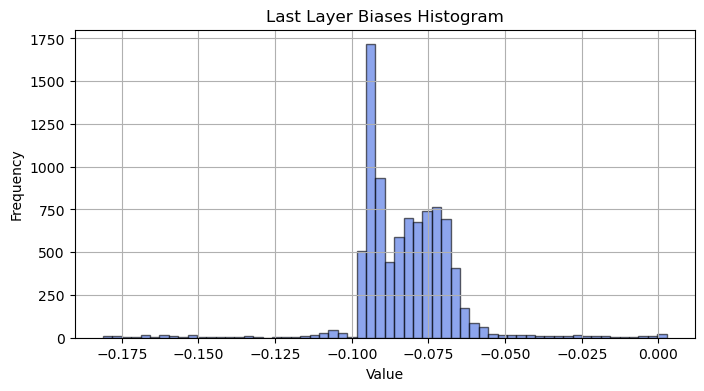

In [ ]:
def plot_histogram(data, title, bins=60):
    plt.figure(figsize=(8, 4))
    plt.hist(data.flatten(), bins=bins, alpha=0.6, color='royalblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms for first and last layer weights & biases
plot_histogram(first_layer_weights, 'First Layer Weights Histogram')
plot_histogram(first_layer_bias, 'First Layer Biases Histogram')
plot_histogram(last_layer_weights, 'Last Layer Weights Histogram')
plot_histogram(last_layer_bias, 'Last Layer Biases Histogram')


In [ ]:
cp_nnpb = cosmopower_NN(restore=True,
                      restore_filename='/home/ezmsolla/scaledTT_cp_NN_sample',
                      ) # write whatever your filename is called (this is done here for the particle burst emulator)

In [ ]:

pbmodel = cp_nnpb  # Call the model of interest

# Get first and last layer weights and biases
pbfirst_layer_weights = pbmodel.W[0].numpy()
pbfirst_layer_bias = pbmodel.b[0].numpy()
pblast_layer_weights = pbmodel.W[-1].numpy()
pblast_layer_bias = pbmodel.b[-1].numpy()
pb_weights = [pbmodel.W[i].numpy() for i in range(4)]
pb_biases = [pbmodel.b[i].numpy() for i in range(4)]

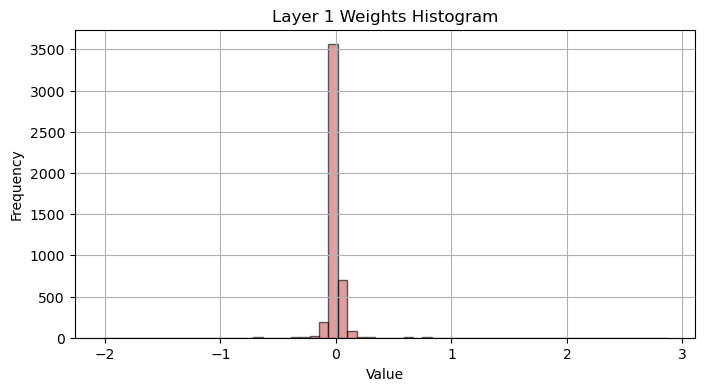

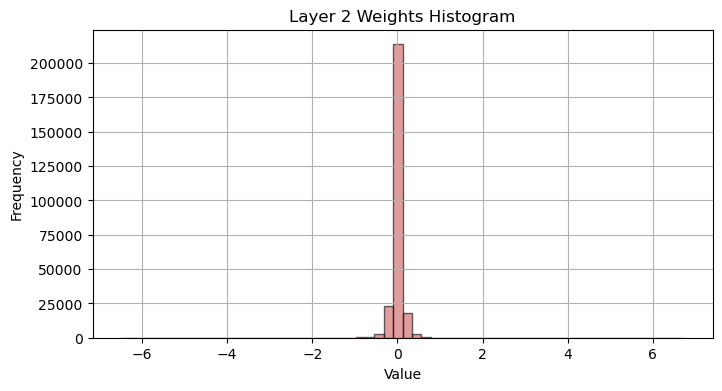

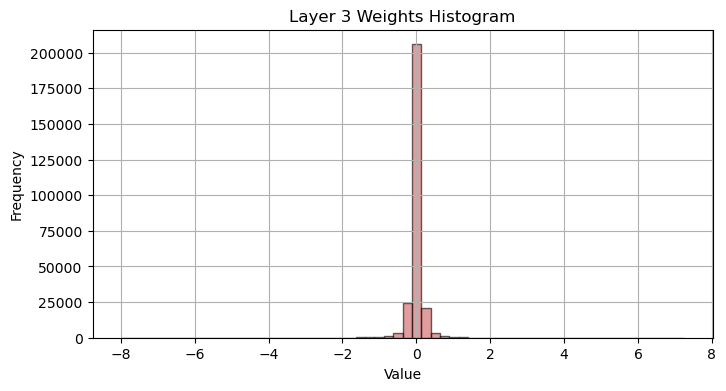

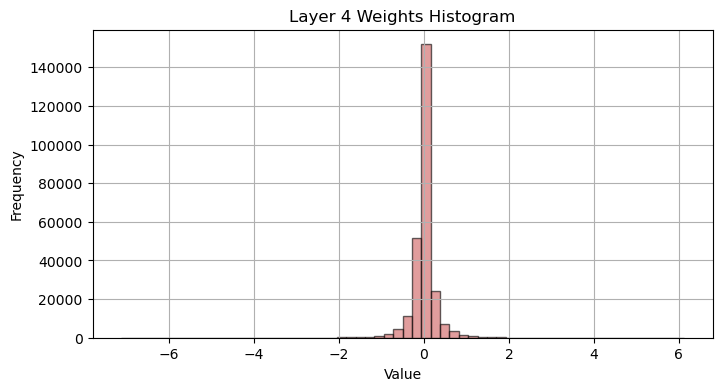

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(data, title, bins=60):
    plt.figure(figsize=(8, 4))
    plt.hist(data.flatten(), bins=bins, alpha=0.6, color='indianred', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Loop through all layers and plot histograms
for i in range(4):
    plot_histogram(pb_weights[i], f'Layer {i+1} Weights Histogram')
    #plot_histogram(pb_biases[i], f'Layer {i+1} Biases Histogram')


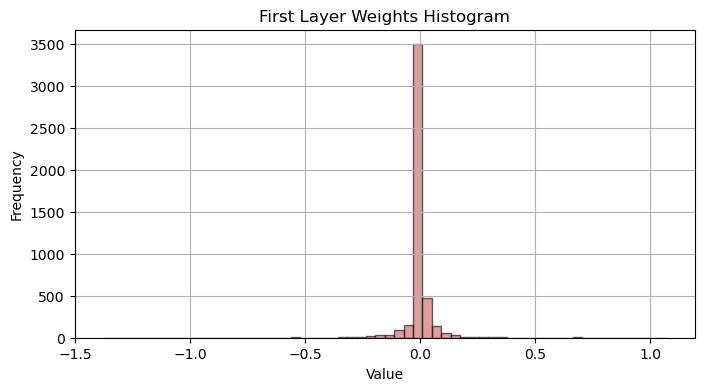

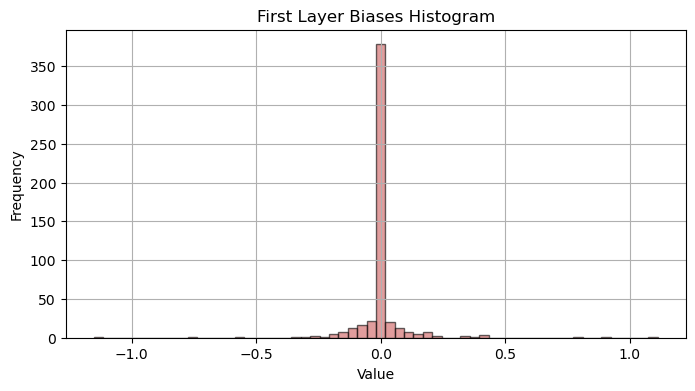

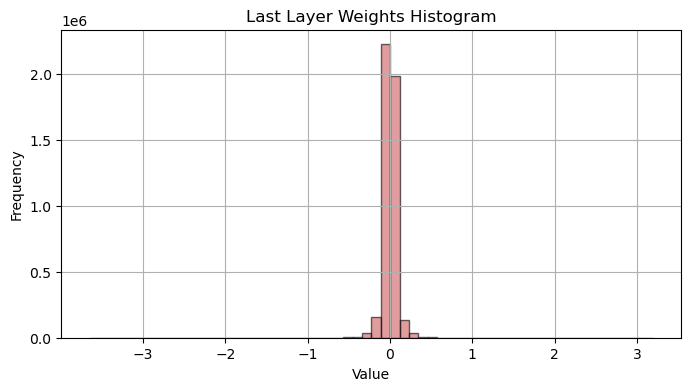

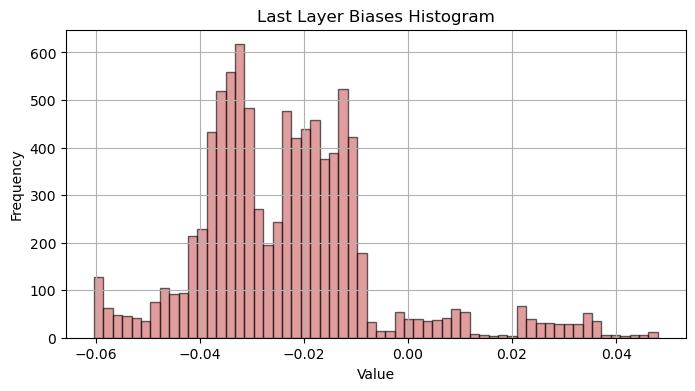

In [ ]:
def plot_histogram(data, title, bins=60):
    plt.figure(figsize=(8, 4))
    plt.hist(data.flatten(), bins=bins, alpha=0.6, color='indianred', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms for first and last layer weights & biases
plot_histogram(pbfirst_layer_weights, 'First Layer Weights Histogram')
plot_histogram(pbfirst_layer_bias, 'First Layer Biases Histogram')
plot_histogram(pblast_layer_weights, 'Last Layer Weights Histogram')
plot_histogram(pblast_layer_bias, 'Last Layer Biases Histogram')


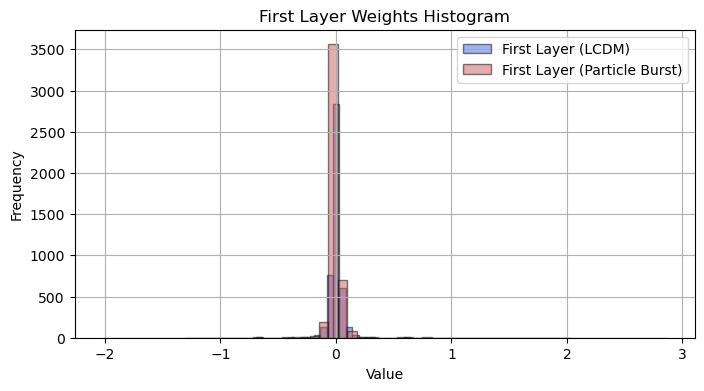

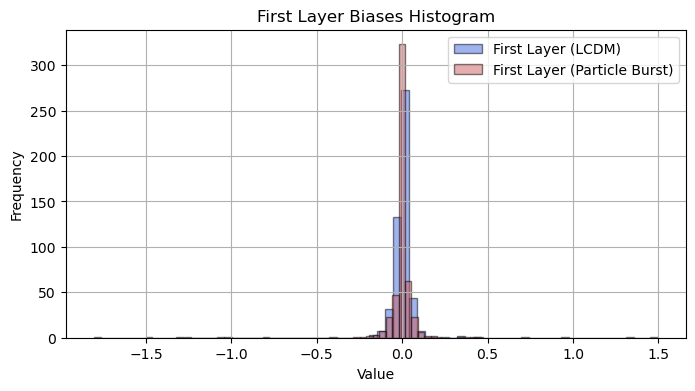

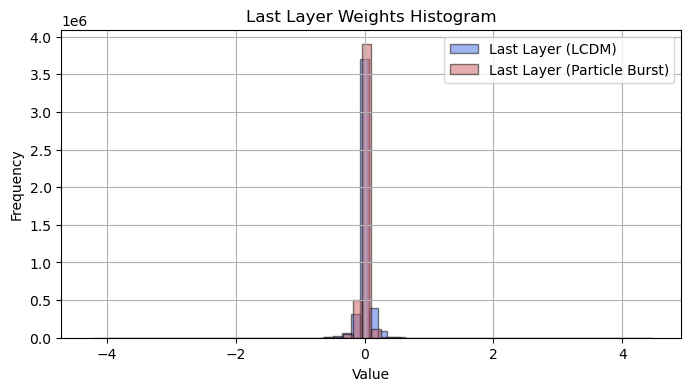

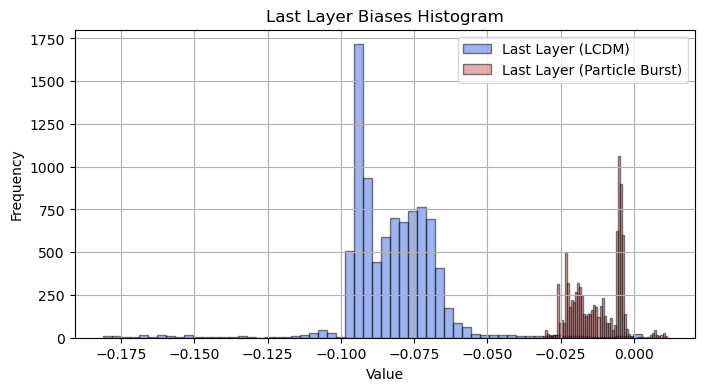

In [ ]:
import matplotlib.pyplot as plt

def plot_overlay_histogram(data1, data2, label1, label2, title, bins=60):
    plt.figure(figsize=(8, 4))
    plt.hist(data1.flatten(), bins=bins, alpha=0.5, color='royalblue', edgecolor='black', label=label1)
    plt.hist(data2.flatten(), bins=bins, alpha=0.5, color='indianred', edgecolor='black', label=label2)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Overlay histograms for first and last layer weights & biases
plot_overlay_histogram(first_layer_weights, pbfirst_layer_weights,
                       'First Layer (LCDM)', 'First Layer (Particle Burst)',
                       'First Layer Weights Histogram')

plot_overlay_histogram(first_layer_bias, pbfirst_layer_bias,
                       'First Layer (LCDM)', 'First Layer (Particle Burst)',
                       'First Layer Biases Histogram')

plot_overlay_histogram(last_layer_weights, pblast_layer_weights,
                       'Last Layer (LCDM)', 'Last Layer (Particle Burst)',
                       'Last Layer Weights Histogram')

plot_overlay_histogram(last_layer_bias, pblast_layer_bias,
                       'Last Layer (LCDM)', 'Last Layer (Particle Burst)',
                       'Last Layer Biases Histogram')
